## Investigating How Data Scientists Answered the Stack Overflow Survey

### Background
I am investigating the 2017 Stack Overflow survey results. A brief description of the survey and the relevant files can be found on [Kaggle](https://www.kaggle.com/stackoverflow/so-survey-2017).

### Questions
Since I am taking the Data Science Nanodegree program from Udacity, I am interested in how data scientists answered the questions in this survey.  The questions I will explore are:
1. How does the mean salary for a data scientist compare to other developer types?
2. How does the mean job satisfaction for a data scientist compare to other developer types?
3. What types of education do data scientists recommend?

In [35]:
# Import packages and read in data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

df = pd.read_csv('survey_results_public.csv')
schema = pd.read_csv('survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# Look at some basic descriptive statistics...
display(df.describe())
display(df.shape)

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,19102.000000,16102.000000,15253.000000,7721.000000,13452.000000,5009.000000,818.000000
mean,9551.500000,7.343932,7.000721,3.685922,8.357865,58341.398571,32231.521687
std,5514.416757,1.919330,2.128648,7.330691,1.405546,40753.384986,28543.877274
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4776.250000,6.000000,6.000000,0.000000,8.000000,27956.989247,4716.459735
50%,9551.500000,8.000000,7.000000,1.000000,8.000000,51612.903226,29784.946237
75%,14326.750000,9.000000,8.000000,3.000000,9.000000,83333.333333,50000.000000
max,19102.000000,10.000000,10.000000,40.000000,10.000000,195000.000000,120000.000000


(19102, 154)

There are 19,102 rows in the dataset, with each corresponding to a single respondent.  Of the 154 columns, however, there are only 6 columns that have numerical data, which means that most of the columns have categorical responses, including the column that I am interested in exploring first: 'DeveloperType'.

In [37]:
# Look at the first 10 rows of DeveloperType:
df['DeveloperType'].head(10)

0                                                  NaN
1                                                  NaN
2                                                Other
3                                                  NaN
4    Mobile developer; Graphics programming; Deskto...
5                                                  NaN
6                                                  NaN
7                                        Web developer
8                      Web developer; Mobile developer
9     Mobile developer; Desktop applications developer
Name: DeveloperType, dtype: object

Not every respondent provided a developer type, meaning that my sample size will be less than the 19,102 in the dataset.  I also see some respondents provided multiple answers, separated by semicolons, which need to be parsed out.

In [38]:
# Create a function to identify unique responses in DeveloperType
def unique_responses(df_column):
    '''
    Identifies the unique responses in a column of the Stack Overflow dataset
    
    df_column: pandas Series, the column from the pandas Dataframe to parse
    
    returns response_set, a set of the unique responses
    '''
    # Initialize the set
    response_set = set()
    
    # Loop through the column
    for response in df_column:
        # Split the response by semicolon and a space (; ) into multiple developer types
        dev_types = str(response).split('; ')
        # For each developer type in the response, add it to the set of responses
        for dev_type in dev_types:
            response_set.add(dev_type)

    return response_set

In [39]:
# View unique responses in DeveloperType
developer_responses = unique_responses(df['DeveloperType'])
developer_responses

{'Data scientist',
 'Database administrator',
 'Desktop applications developer',
 'DevOps specialist',
 'Developer with a statistics or mathematics background',
 'Embedded applications/devices developer',
 'Graphic designer',
 'Graphics programming',
 'Machine learning specialist',
 'Mobile developer',
 'Other',
 'Quality assurance engineer',
 'Systems administrator',
 'Web developer',
 'nan'}

There are 15 different unique responses to the 'DeveloperType' question, including 'Other' and 'nan' (meaning the respondent didn't answer this question).  Of the 13 possible Developer types listed, 'Data scientist' and 'Machine learning specialist' are the only two that I would consider to be in the data science realm.  I am curious how these two types compare to the rest of the types listed.  But first, I want to know how many respondents fall under each developer type.

In [40]:
# Create a dictionary of the number of responsed for each DeveloperType

# Initialize a dictionary for counting
response_dict = dict.fromkeys(developer_responses,0)
# Loop through each row of the dataframe
for response in df['DeveloperType']:
    # For each developer type in the response, increment the dictionary count by 1
    for dev_type in str(response).split('; '):
        response_dict[dev_type] += 1

response_dict

{'Mobile developer': 2905,
 'DevOps specialist': 1505,
 'Developer with a statistics or mathematics background': 1479,
 'Graphic designer': 439,
 'Data scientist': 1077,
 'Other': 996,
 'Web developer': 10086,
 'Machine learning specialist': 488,
 'Database administrator': 1827,
 'Desktop applications developer': 3869,
 'Systems administrator': 1479,
 'nan': 5330,
 'Quality assurance engineer': 429,
 'Embedded applications/devices developer': 1174,
 'Graphics programming': 584}

In [41]:
# Visualize the response dictionary in a dataframe
response_df = pd.DataFrame.from_dict(response_dict,orient='index',columns=['Count'])
response_df.sort_values(by='Count',ascending=False)

,Count
Web developer,10086
nan,5330
Desktop applications developer,3869
Mobile developer,2905
Database administrator,1827
DevOps specialist,1505
Developer with a statistics or mathematics background,1479
Systems administrator,1479
Embedded applications/devices developer,1174
Data scientist,1077


In [42]:
# Since the respondents that did not answer this question do not provide any information to help answer my questions,
# I will drop that response from my dataframe
response_df.drop(index='nan',inplace=True)

In [43]:
# Add a column to the dataframe to reflect percentage of respondents
response_df['Frequency'] = response_df['Count']/response_df['Count'].sum()

In [44]:
response_df_sorted = response_df.sort_values(by='Count',ascending=False)

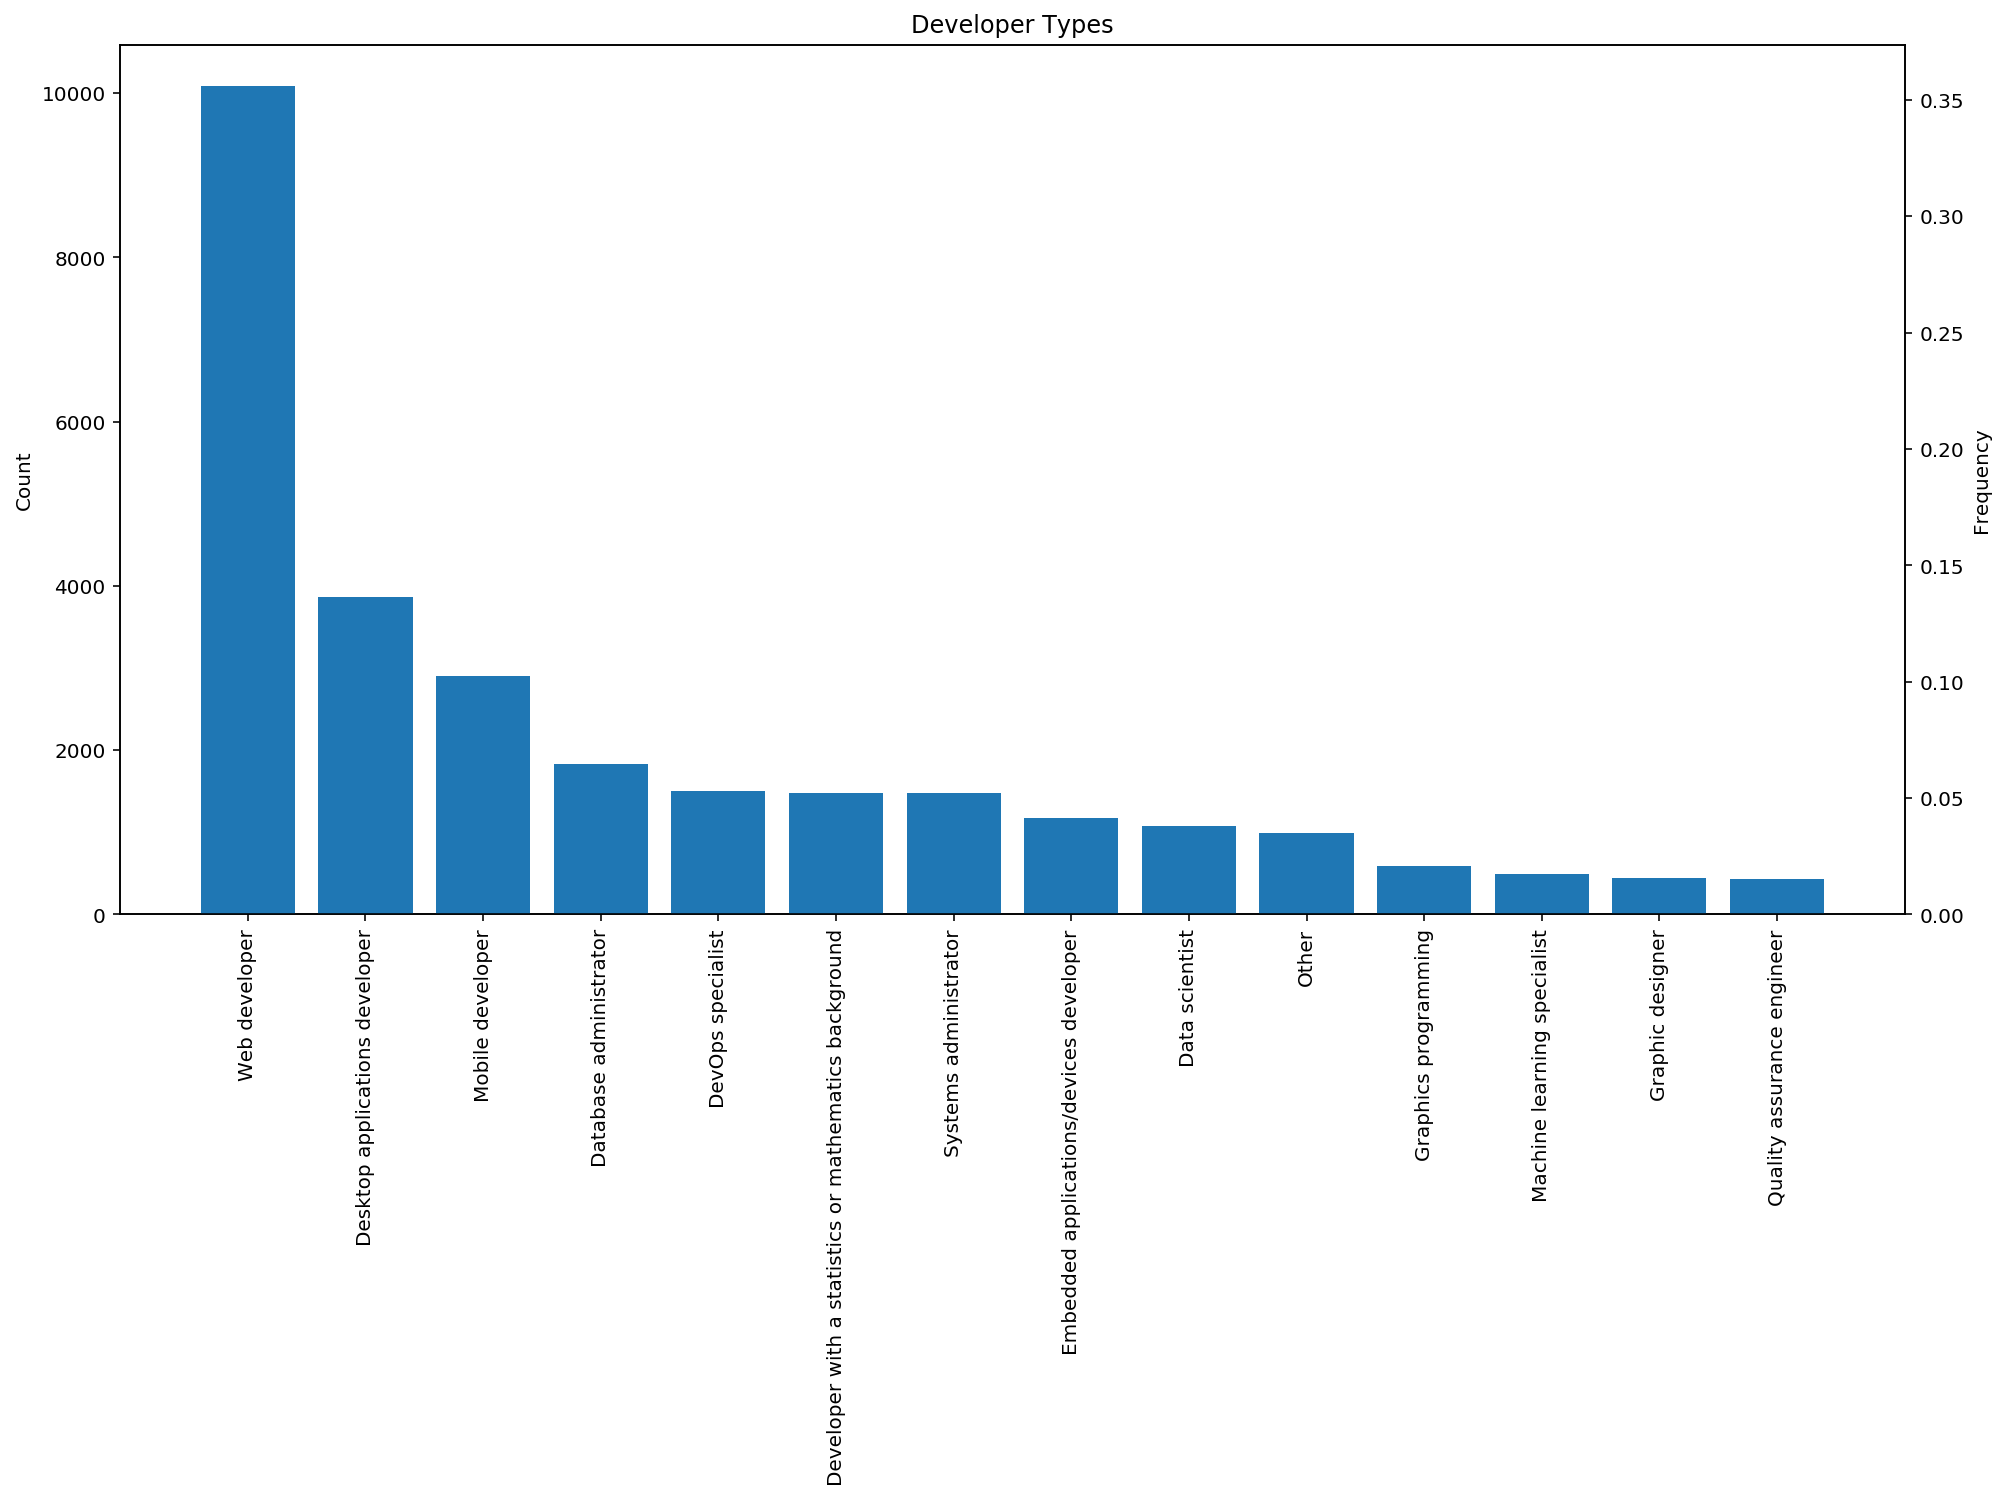

In [45]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(111)
ax1.bar(response_df_sorted.index,response_df_sorted['Count'])
ax2 = ax1.twinx()
ax2.bar(response_df_sorted.index,response_df_sorted['Frequency'])
ax1.set_xticklabels(response_df_sorted.index, rotation=90)
ax1.set_ylabel('Count')
ax2.set_ylabel('Frequency')
ax1.set_title('Developer Types')
plt.show()